In [1]:
# Objective:
# The objective is to implement a recommendation system using cosine similarity on an anime dataset.
# Dataset:
# Use the Anime Dataset which contains information about various anime, including their titles,
# genres,No.of episodes and user ratings etc.

In [2]:
# Data Description:

# Unique ID of each anime.
# Anime title.
# Anime broadcast type, such as TV, OVA, etc.
# anime genre.
# The number of episodes of each anime.
# The average rating for each anime compared to the number of users who gave ratings.

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
# Loading the dataset

df = pd.read_csv("anime.csv")
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [5]:
# Exploratory data analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [7]:
df.shape

(12294, 7)

In [8]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [9]:
df.tail()

,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [10]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

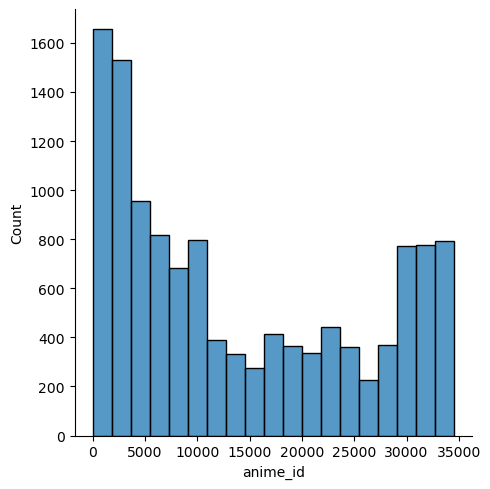

In [11]:
# Visualizations

sns.displot(df['anime_id'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_1896\4020001063.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['anime_id'])


<Axes: xlabel='anime_id', ylabel='Density'>

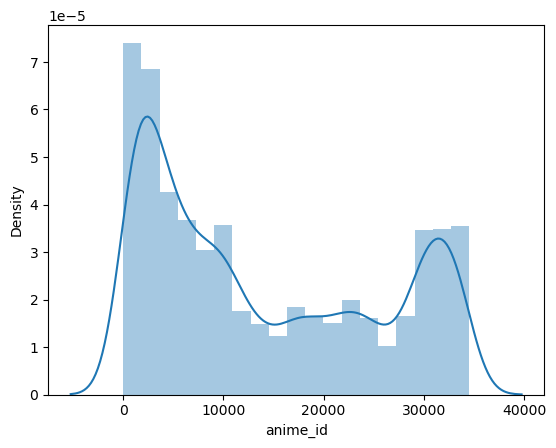

In [12]:
sns.distplot(df['anime_id'])

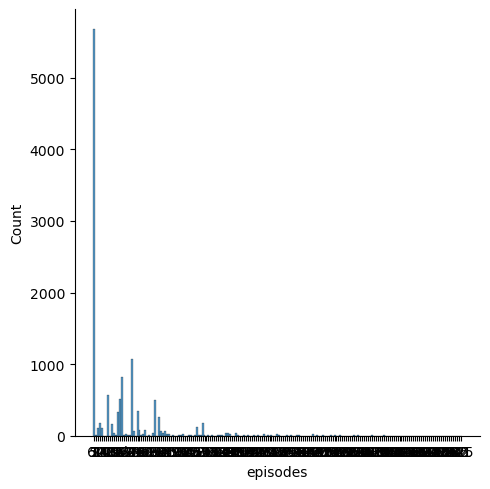

In [13]:
sns.displot(df['episodes'])

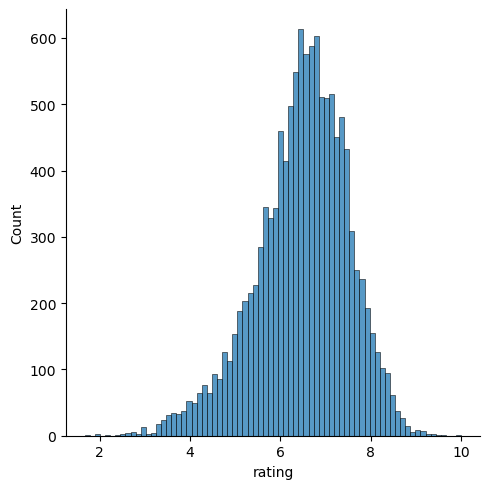

In [14]:
sns.displot(df['rating'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_1896\2293597686.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rating'])


<Axes: xlabel='rating', ylabel='Density'>

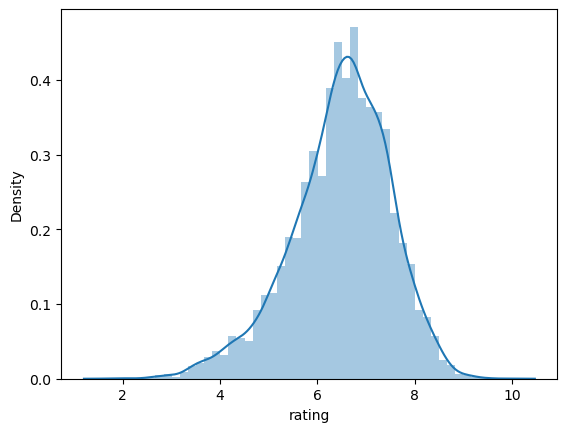

In [15]:
sns.distplot(df['rating'])

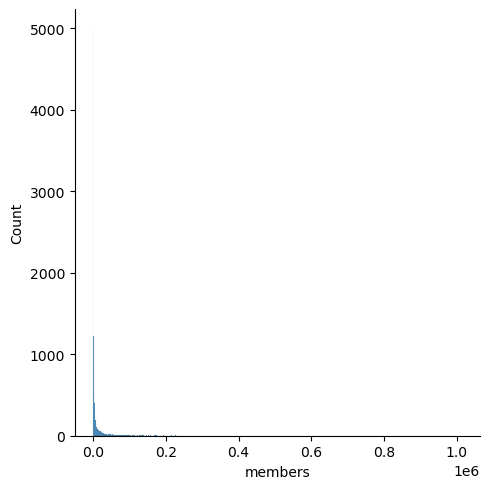

In [16]:
sns.displot(df['members'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_1896\2132811243.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['members'])


<Axes: xlabel='members', ylabel='Density'>

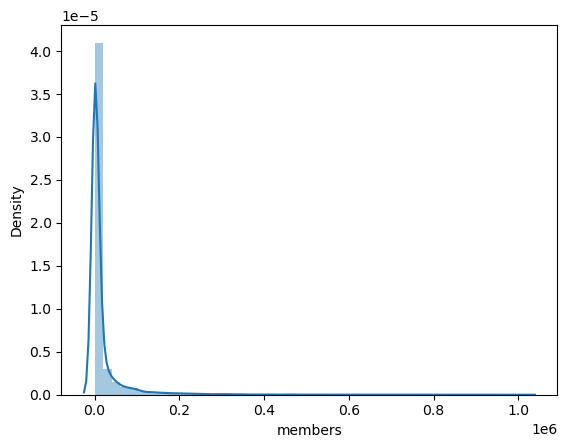

In [17]:
sns.distplot(df['members'])

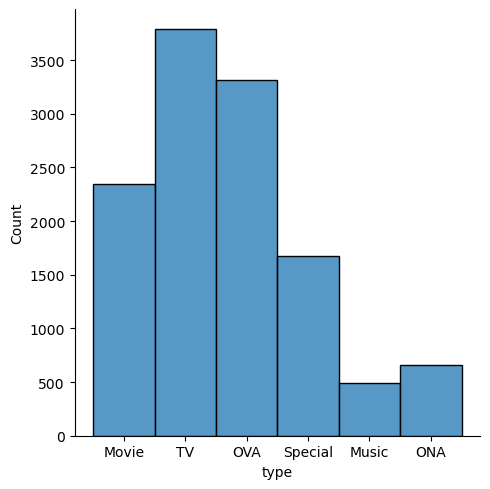

In [18]:
sns.displot(df['type'])

In [19]:
# Handling missing values

df.isnull()

,anime_id,name,genre,type,episodes,rating,members
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
12289,False,False,False,False,False,False,False
12290,False,False,False,False,False,False,False
12291,False,False,False,False,False,False,False
12292,False,False,False,False,False,False,False


In [20]:
df.isnull().sum()

# 62 empty values in genre, 25 in type and 230 in ratings

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [21]:
# Fill missing values using mean or mode of that column
df['genre'] = df['genre'].fillna(df['genre'].mode()[0])
df['type'] = df['type'].fillna(df['type'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mean())

In [22]:
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [23]:
# Feature extraction

selected_features = ['name','genre','type']
print(selected_features)

['name', 'genre', 'type']


In [24]:
# Combining the 3 features

combined_features = df['name'] + ' ' + df['genre'] + ' ' + df['type']
print(combined_features)

0        Kimi no Na wa. Drama, Romance, School, Superna...
1        Fullmetal Alchemist: Brotherhood Action, Adven...
2        Gintama° Action, Comedy, Historical, Parody, S...
3                          Steins;Gate Sci-Fi, Thriller TV
4        Gintama&#039; Action, Comedy, Historical, Paro...
                               ...                        
12289    Toushindai My Lover: Minami tai Mecha-Minami H...
12290                               Under World Hentai OVA
12291            Violence Gekiga David no Hoshi Hentai OVA
12292    Violence Gekiga Shin David no Hoshi: Inma Dens...
12293        Yasuji no Pornorama: Yacchimae!! Hentai Movie
Length: 12294, dtype: object


In [25]:
# Convert text data to feature vectors

vectorizer = TfidfVectorizer()

In [26]:
feature_vectors = vectorizer.fit_transform(combined_features)
print(feature_vectors)

  (0, 7052)	0.2153865705811725
  (0, 10286)	0.283528096839026
  (0, 9230)	0.2693369646930725
  (0, 8877)	0.2551674128629534
  (0, 2454)	0.2272779065505823
  (0, 11410)	0.388228413282953
  (0, 7158)	0.4550925136134089
  (0, 7534)	0.19620630762634764
  (0, 5466)	0.5362694990332014
  (1, 11112)	0.12857235222456834
  (1, 9797)	0.172280263721211
  (1, 6777)	0.2588878539236986
  (1, 6319)	0.2225516116878708
  (1, 2810)	0.15857970891118642
  (1, 263)	0.1575372207562887
  (1, 241)	0.14631654238462669
  (1, 1201)	0.5232329199323216
  (1, 400)	0.48205471843282277
  (1, 3003)	0.48205471843282277
  (1, 2454)	0.16533692266563005
  (2, 2844)	0.22151944869308507
  (2, 9233)	0.22151944869308507
  (2, 9117)	0.423992639108767
  (2, 8153)	0.3507174411365573
  (2, 4062)	0.2965866310512251
  :	:
  (12290, 11595)	0.558697069549429
  (12290, 8046)	0.20656365198325938
  (12291, 2115)	0.5261214418153375
  (12291, 11370)	0.5024992438122489
  (12291, 3221)	0.513121208140852
  (12291, 3935)	0.19353130525536577
  

In [27]:
# Cosine similarity

# Getting similarity score using cosine similarity

similarity = cosine_similarity(feature_vectors)
print(similarity)

[[1.         0.03757743 0.         ... 0.02746398 0.02264862 0.05928598]
 [0.03757743 1.         0.0906605  ... 0.         0.         0.        ]
 [0.         0.0906605  1.         ... 0.         0.         0.        ]
 ...
 [0.02746398 0.         0.         ... 1.         0.82466648 0.05584731]
 [0.02264862 0.         0.         ... 0.82466648 1.         0.04605541]
 [0.05928598 0.         0.         ... 0.05584731 0.04605541 1.        ]]


In [28]:
print(similarity.shape)

(12294, 12294)


In [29]:
# Anime recommendation system

# User input
anime_name = input('Enter the anime name:')

# All anime names
list_of_all_names = df['name'].tolist()

# Finding close match
find_close_match = difflib.get_close_matches(anime_name,list_of_all_names)

close_match = find_close_match[0]

# Finding index of the anime
index_of_the_anime = df[df.name == close_match].index.values[0]

# Getting a list of similar movies
similarity_score = list(enumerate(similarity[index_of_the_anime]))

# Sorting the anime
sorted_similar_anime = sorted(similarity_score, key = lambda x:x[1], reverse=True)

# Print the names of similar anime based on index
print("Anime Suggested for you : \n")

i = 1
for anime in sorted_similar_anime:
  index = anime[0]
  name_from_index = df[df.index==index]['name'].values[0]
  if i <= 30:
    print(i,'.',name_from_index)
    i = i+1

Enter the anime name:code
Anime Suggested for you : 

1 . Recorder
2 . ◯
3 . Recorder to Randoseru
4 . Recorder to Randoseru Re♪
5 . Recorder to Randoseru Mi☆
6 . Recorder to Randoseru Do♪
7 . Sol
8 . Phantasm
9 . Recorder to Randoseru Mi☆ Special
10 . Jubilee
11 . Extra
12 . Calm
13 . Pulsar
14 . Connected
15 . Animation!
16 . Rinkaku
17 . Yume
18 . Music S.T.A.R.T!!
19 . Wonder (Movie)
20 . Ghost
21 . Tokyo Fantasia
22 . Mononoke Dance
23 . Animal Dance
24 . Oh Yoko!
25 . Survival
26 . Kiseki
27 . Master Blaster
28 . Tori
29 . Kairaku no Sono
30 . Madonna (Movie)


In [30]:
# Model performance evaluation

# Split the data into train and test

x = df.drop(columns = ['name','genre','type','episodes','members'],axis=1)
x.head()

,anime_id,rating
0,32281,9.37
1,5114,9.26
2,28977,9.25
3,9253,9.17
4,9969,9.16


In [31]:
y = df['episodes']
y.head()

0     1
1    64
2    51
3    24
4    51
Name: episodes, dtype: object

In [32]:
# Model training

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\mihir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
pred = model.predict(x_test)
pred

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [34]:
# Classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.48      1.00      0.65      1173
          10       0.00      0.00      0.00        20
         100       0.00      0.00      0.00         3
         101       0.00      0.00      0.00         1
         103       0.00      0.00      0.00         1
         104       0.00      0.00      0.00         3
         108       0.00      0.00      0.00         1
         109       0.00      0.00      0.00         2
          11       0.00      0.00      0.00        20
         110       0.00      0.00      0.00         1
          12       0.00      0.00      0.00       157
         124       0.00      0.00      0.00         1
         128       0.00      0.00      0.00         1
          13       0.00      0.00      0.00       111
         130       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         5
         140       0.00      0.00      0.00         2
         142       0.00    

C:\Users\mihir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
print('Accuracy:',model.score(x_test,y_test))
score = cross_val_score(model,x,y)
print("Score:",score)
print("CV Score:",np.mean(score))

C:\Users\mihir\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.4770231801545344


C:\Users\mihir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Score: [0.46197641 0.46197641 0.46156974 0.46156974 0.46175753]
CV Score: 0.4617699680786046


C:\Users\mihir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# Interview Questions:

# 1. Can you explain the difference between user-based and item-based collaborative filtering?

# In simple words item based collaborative filtering is based on the notion of item similarity.
# While user based collaborative filtering is based on the notion of user similarity.
# If you are using item based cf then recommendation will be made based on the most similar items
# to the items you have expressed preference for. Where as in the case of user based cf the most
# common technique is to find a neighborhood of users that share similar taste with you and then the
# recommendation is performed.

In [37]:
# 2. What is collaborative filtering, and how does it work?

# In Collaborative Filtering, we tend to find similar users and recommend what similar users like.
# In this type of recommendation system, we don’t use the features of the item to recommend it,
# rather we classify the users into clusters of similar types and recommend each user
# according to the preference of its cluster.

# There are basically four types of algorithms o say techniques to build Collaborative filtering recommender systems:

# Memory-Based
# Model-Based
# Hybrid
# Deep Learning